In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import random
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

In [6]:
#scale the  variables
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train, X_test, y_train, y_test=map(lambda x:pd.DataFrame(data=x), [X_train, X_test, y_train, y_test])

In [8]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(y_train))

(506, 13)
(506,)
(354, 13)
(354, 1)
(152, 13)
(152, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
def customSGD(trainData, trainLabels, n_iterations, learning_rate):
    
    
    #initialise weight vector w and bias b
    w = np.zeros(trainData.shape[1])
    b = 0

    while( n_iterations > 0):
        
        #3% of data poits as batch size
        batch_size=int(X.shape[0] * 0.03)
  
        sampleTrainData=trainData.sample(batch_size)
        x=np.array(sampleTrainData)
        y=np.array(trainLabels.iloc[sampleTrainData.index])

        w_gradient=np.zeros(trainData.shape[1])
        b_gradient=np.zeros(1)
        
        y_predict=[]
        

        for i in range(batch_size):

            y_predict=np.dot(w, x[i]) + b
            
            #gradient of weight vector w and bias b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(y_predict))
            b_gradient=b_gradient+(-2)*(y[i]-y_predict)
            
            grad_w = w + (-2)*x[i]*(y[i]-y_predict)
            grad_b = b + (-2)*(y[i]-y_predict)

            w = w - learning_rate*w_gradient
            b = b - learning_rate*b_gradient
            learning_rate = learning_rate
            
        
            n_iterations-=1

    return w, b

In [26]:
#target prediction of customSGD
def predict(x, w, b):
    y_pred=[]
    x=np.array(x)
    
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
        
    
    return np.array(y_pred)


In [34]:
lst=[]
n_iterations=[i for i in range (100, 2000, 200)]
learning_rates= [pow(10,i) for i in range (-6, -2)]


for i in n_iterations:
    for j in learning_rates:
        w, b=customSGD(X_train, y_train, i, j)
        lst.append(list((i, j, float(mean_squared_error(y_test, predict(X_test, w, b))),
                         float(mean_absolute_error(y_test, predict(X_test, w, b))))))


In [35]:
lst=sorted(lst, key= lambda x:x[2])
df = pd.DataFrame(data=lst, columns = ['n_ieration', 'learning_rate', 'MSE', 'MAE'])[:11] 
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df

,n_ieration,learning_rate,MSE,MAE
0,900,0.00100,21.00710,3.12539
1,1700,0.00100,22.40372,3.18321
2,1900,0.00010,26.01586,3.11310
3,1100,0.00100,27.34119,3.75591
4,1900,0.00100,27.82412,3.79475
5,1500,0.00100,28.07922,3.56823
6,1700,0.00010,28.19452,3.24569
7,1500,0.00010,28.76398,3.44172
8,500,0.00100,33.29740,4.16146
9,1300,0.00010,34.70829,3.74389


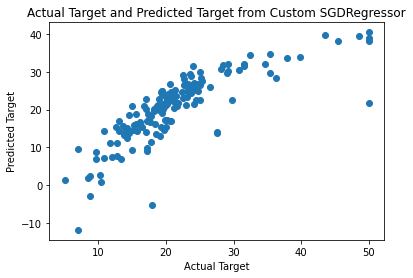

In [29]:
plt.scatter(y_test, predict(X_test, w, b))
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual Target and Predicted Target from Custom SGDRegressor')
plt.show()

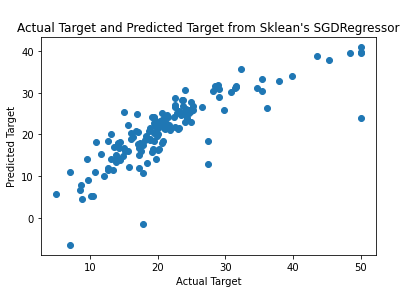

Mean Squared Error : 22.84418088559415
Mean Absolute Error : 3.197020850289163


In [30]:
# SkLearn SGD classifier
n_iter=700
clf_ = SGDRegressor(max_iter=n_iter, eta0=0.001 , random_state=42)
clf_.fit(X_train, y_train)
y_pred=clf_.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('\nActual Target and Predicted Target from Sklean\'s SGDRegressor')
plt.show()

print('Mean Squared Error : {}'.format(mean_squared_error(y_test, y_pred)) )
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, y_pred)) )

In [31]:
from prettytable import prettytable
x=PrettyTable()
x.field_names=['Model', 'Optimum MSE', 'Optimum MAE']
x.add_row(['Custom SGDRegressor', '21.00710', '3.12539'])
x.add_row(['Sklearn\'s SGDRegressor', '22.84418', '3.19702'])

print(x)

+------------------------+-------------+-------------+
|         Model          | Optimum MSE | Optimum MAE |
+------------------------+-------------+-------------+
|  Custom SGDRegressor   |   21.56453  |   3.18287   |
| Sklearn's SGDRegressor |   22.84418  |   3.19702   |
+------------------------+-------------+-------------+


### Conclusions
- We built our Custom SGDRegressor model that takes n_iteration and learning_rates as hyperparameter
- Undersood clearly how internals of Schocastic Gradient Descend's internal algorithm works
- Our model with best fit parameters could perform slightly good than Sklearn's SGDRegressor for best parameters